In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/content/UpdatedResumeDataSet.csv')
data.head(5)

Category                                             Resume
0  Data Science  Skills * Programming Languages: Python (pandas...
1  Data Science  Education Details \r\nMay 2013 to May 2017 B.E...
2  Data Science  Areas of Interest Deep Learning, Control Syste...
3  Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4  Data Science  Education Details \r\n MCA   YMCAUST,  Faridab...

In [3]:
data.shape

(962, 2)

# **Data Visualization**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [5]:
data['Category'].value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

<Axes: xlabel='count', ylabel='Category'>

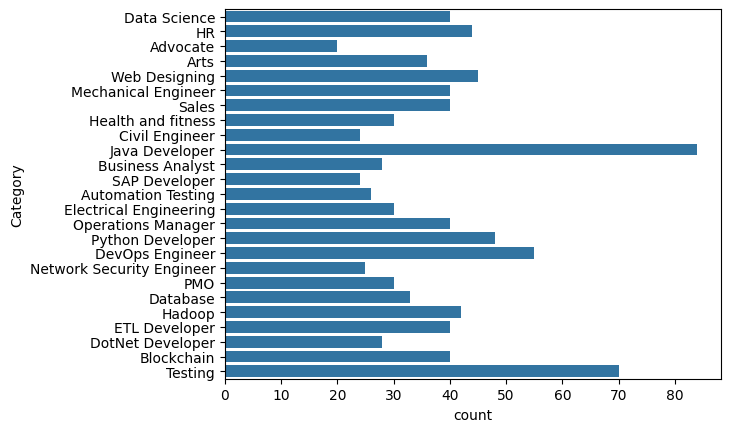

In [6]:
sns.countplot(data['Category'])

([<matplotlib.patches.Wedge at 0x7d03f16f1000>,
 [Text(1.058871228953308, 0.29797939609125923, 'Data Science'),
  Text(0.7841417468169057, 0.7714413269322118, 'HR'),
  Text(0.4134731563409379, 1.0193330903024107, 'Advocate'),
  Text(0.053862331076050214, 1.098680503736666, 'Arts'),
  Text(-0.2771758554020645, 1.0645062447830609, 'Web Designing'),
  Text(-0.5706079161115722, 0.9404289479119671, 'Mechanical Engineer'),
  Text(-0.8089120262381768, 0.7454269473310228, 'Sales'),
  Text(-0.9773196261993998, 0.5048230860860717, 'Health and fitness'),
  Text(-1.0745482070561094, 0.23525762625789806, 'Civil Engineer'),
  Text(-1.0988505454600117, -0.05027403646252011, 'Java Developer'),
  Text(-1.0485773173407904, -0.3323937567981556, 'Business Analyst'),
  Text(-0.9271404102234844, -0.5919549473825093, 'SAP Developer'),
  Text(-0.7427813690411197, -0.811341998053472, 'Automation Testing'),
  Text(-0.5207132389301881, -0.9689467079271352, 'Electrical Engineering'),
  Text(-0.291057286964679, -1

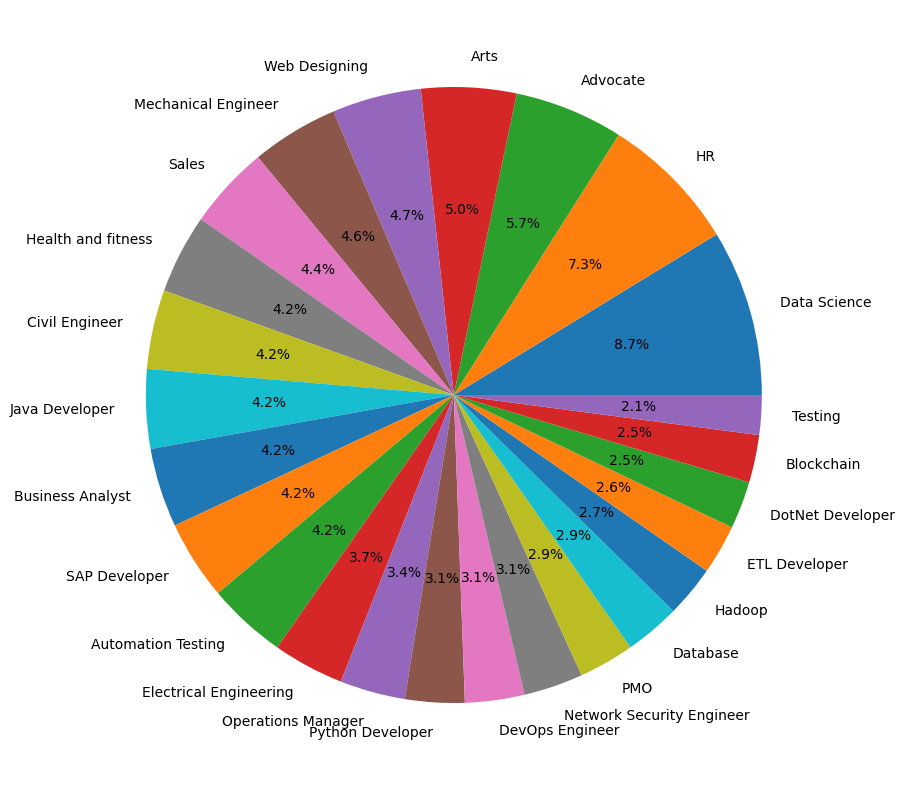

In [7]:
counts = data['Category'].value_counts()
label = data['Category'].unique()
plt.figure(figsize=(13,10))
plt.pie(counts, labels = label, autopct='%1.1f%%')


# **Data Cleaning**

In [8]:
data['Resume'][1]

'Education Details \r\nMay 2013 to May 2017 B.E   UIT-RGPV\r\nData Scientist \r\n\r\nData Scientist - Matelabs\r\nSkill Details \r\nPython- Exprience - Less than 1 year months\r\nStatsmodels- Exprience - 12 months\r\nAWS- Exprience - Less than 1 year months\r\nMachine learning- Exprience - Less than 1 year months\r\nSklearn- Exprience - Less than 1 year months\r\nScipy- Exprience - Less than 1 year months\r\nKeras- Exprience - Less than 1 year monthsCompany Details \r\ncompany - Matelabs\r\ndescription - ML Platform for business professionals, dummies and enthusiasts.\r\n60/A Koramangala 5th block,\r\nAchievements/Tasks behind sukh sagar, Bengaluru,\r\nIndia                               Developed and deployed auto preprocessing steps of machine learning mainly missing value\r\ntreatment, outlier detection, encoding, scaling, feature selection and dimensionality reduction.\r\nDeployed automated classification and regression model.\r\nlinkedin.com/in/aditya-rathore-\r\nb4600b146        

In [9]:
import re
def CleanResume(txt):
  CleanTxt = re.sub('http\S+\s', ' ', txt)
  CleanTxt = re.sub('@\S+', ' ', CleanTxt)
  CleanTxt = re.sub('#\S+', ' ', CleanTxt)
  CleanTxt = re.sub('RT|CC', ' ', CleanTxt)
  CleanTxt = re.sub('\s+', ' ', CleanTxt)
  CleanTxt = re.sub(r'[^\x00-\x7f]', ' ', CleanTxt)
  CleanTxt = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', CleanTxt)

  return CleanTxt

In [10]:
CleanResume("Exprience 24 months \r\n Python")

'Exprience 24 months Python'

In [11]:
data['Resume'] = data['Resume'].apply(lambda x: CleanResume(x))

In [12]:
data['Resume'][1]

'Education Details May 2013 to May 2017 B E UIT RGPV Data Scientist Data Scientist   Matelabs Skill Details Python  Exprience   Less than 1 year months Statsmodels  Exprience   12 months AWS  Exprience   Less than 1 year months Machine learning  Exprience   Less than 1 year months Sklearn  Exprience   Less than 1 year months Scipy  Exprience   Less than 1 year months Keras  Exprience   Less than 1 year monthsCompany Details company   Matelabs description   ML Platform for business professionals  dummies and enthusiasts  60 A Koramangala 5th block  Achievements Tasks behind sukh sagar  Bengaluru  India Developed and deployed auto preprocessing steps of machine learning mainly missing value treatment  outlier detection  encoding  scaling  feature selection and dimensionality reduction  Deployed automated classification and regression model  linkedin com in aditya rathore  b4600b146 Reasearch and deployed the time series forecasting model ARIMA  SARIMAX  Holt winter and Prophet  Worked on

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [14]:
le.fit(data['Category'])
data['Category'] = le.transform(data['Category'])

In [15]:
data['Category'].unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

# **Vectorization**

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

In [17]:
tfidf.fit(data['Resume'])
target = tfidf.transform(data['Resume'])

# **Training the data**

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(target, data['Category'], test_size=0.20, random_state=42)

In [19]:
print(X_train.shape)
print(X_test.shape)

(769, 7339)
(193, 7339)


In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

In [22]:
knn = OneVsRestClassifier(KNeighborsClassifier())
knn.fit(X_train, Y_train)

OneVsRestClassifier(estimator=KNeighborsClassifier())

In [23]:
Y_pred = knn.predict(X_test)
print(accuracy_score(Y_test, Y_pred))

0.9844559585492227


In [28]:
import pickle
pickle.dump(tfidf, open('tfidf.pkl','wb'))
pickle.dump(knn, open('knn.pkl','wb'))

In [57]:
myresume = """
Supply chain Manager
Business Analysis
Power BI
MS Excel
"""

#Python Numpy Pandas Matplotlib Seaborn Sklearn Data Analysis Machine Learning

In [58]:
import pickle

#Loading the trained model
knn = pickle.load(open('knn.pkl', 'rb'))

#Clean the resume
Cleaned_resume = CleanResume(myresume)

#Transform the cleaned resume using the trained Tfidvectorizer
input_features = tfidf.transform([Cleaned_resume])

#Making the predictions uding the load classifier
prediction_id = knn.predict(input_features)[0]

category_mapping = {
    15: "Java Developer",
    23: "Testing",
    8: "DevOps Engineer",
    20: "Python Developer",
    24: "Web Desigener",
    12: "HR",
    13: "Hadoop Developer",
    3: "Blockchain Developer",
    10: "ETL Developer",
    18: "Operations Manager",
    6: "Data Science",
    22: "Sales",
    16: "Mechanical Engineer",
    1: "Arts",
    7: "Database Administrator",
    11: "Electrical Engineer",
    14: "Health and Fitness Expert",
    19: "PMO",
    4: "Business Analyst",
    9: "Dont Net Developer",
    2: "Automation Testing",
    17: "Network Security Engineer",
    21: "SAP Developer",
    5: "Civil Engineer",
    0: "Advocate",
}

category_name = category_mapping.get(prediction_id, "Unknown")

print("Professional Background: ", category_name)

Professional Background:  Business Analyst
